<a href="https://colab.research.google.com/github/Avishek-058/CSE_THESIS-CUET/blob/main/SBERT_my_new_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions


In [ ]:
!pip install pyspellchecker
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import contractions
from spellchecker import SpellChecker  # For spell checking
import emoji  # For handling emojis

# Initialize spell checker
spell = SpellChecker()

# Function to clean text while preserving original meaning
def advanced_clean_text(text):
    if not isinstance(text, str):
        return text  # Return as-is if it's not a string (e.g., NaN)

    # Convert to lowercase
    text = text.lower()

    # Expand contractions (e.g., "aren't" → "are not", "they're" → "they are")
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Fix common abbreviations (e.g., "U.S.A." → "USA", "I.B.M." → "IBM")
    text = re.sub(r'\b([A-Z]\.)+[A-Z]\.?\b', lambda x: x.group().replace('.', ''), text)

    # Handle emojis (convert them to text descriptions)
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Remove special characters (except hyphens and apostrophes)
    text = re.sub(r'[^a-zA-Z0-9\s\'-]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Preserve hyphenated words (e.g., "state-of-the-art")
    text = re.sub(r'(\b\w+)-(\w+\b)', r'\1-\2', text)

    # Preserve decimal numbers (e.g., 3.14 should stay as 3.14)
    text = re.sub(r'(\d+)\.(\d+)', r'\1DOTPLACEHOLDER\2', text)

    # Remove standalone apostrophes (e.g., "rock 'n' roll" → "rock n roll")
    text = re.sub(r"(?<!\w)'|'(?!\w)", "", text)

    # Restore decimal points
    text = text.replace('DOTPLACEHOLDER', '.')

    # Spell check and correct misspelled words
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    text = ' '.join(corrected_words)

    return text

# Example usage
sample_text = "Hey! Check this out: https://example.com 😊. I'm lovin' it! U.S.A. is awesome. State-of-the-art tech. Don't forget to visit @username. 3.14 is pi. This is a testt."
cleaned_text = advanced_clean_text(sample_text)
print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_text)


Original Text: Hey! Check this out: https://example.com 😊. I'm lovin' it! U.S.A. is awesome. State-of-the-art tech. Don't forget to visit @username. 3.14 is pi. This is a testt.
Cleaned Text: hey check this out smiling face with smiling eyes i am loving it you s a is awesome state-of-the-art teach do not forget to visit 3 14 is pi this is a test


In [ ]:
# Apply to DataFrame
df = pd.read_csv('/content/sample_data/final_dataset.csv')  # Load your dataset
df['Cleaned_Review'] = df['Review_Content'].fillna('').apply(advanced_clean_text)

# Save cleaned data
df.to_csv('/content/cleaned_reviews.csv', index=False)
print("✅ Advanced cleaning completed and saved successfully as 'cleaned_reviews.csv'!")

✅ Advanced cleaning completed and saved successfully as 'cleaned_reviews.csv'!


In [ ]:
!rm -rf /root/nltk_data
!mkdir -p /root/nltk_data
!python -m nltk.downloader -d /root/nltk_data all


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping


In [ ]:
import nltk
nltk.data.path.append("/root/nltk_data")

# ✅ Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print("NLTK setup complete!")


NLTK setup complete!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from gensim.utils import tokenize

# ✅ Download required resources
import nltk

# ✅ Download the correct resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # ✅ Corrected this!


# ✅ Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# ✅ Function to get correct POS tags for lemmatization
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN

# ✅ Function to apply tokenization + lemmatization
def lemmatize_text(text):
    tokens = list(tokenize(str(text)))  # Tokenize text
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])

# ✅ Read dataset
df = pd.read_csv("/content/sample_data/cleaned_reviews.csv")  # Change to your actual file

# ✅ Apply lemmatization
df['Lemmatized_Review'] = df['Cleaned_Review'].apply(lemmatize_text)

# ✅ Save to new CSV file
df.to_csv("lemmatized_dataset.csv", index=False)

print("✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!


In [ ]:
df

,Category,Rating,Label,Review_Content,Cleaned_Review,Lemmatized_Review
0,Pet_Supplies_5,3.0,1,Our vet told us that ticks gave become resista...,our vet told us that ticks gave become resista...,our vet told u that tick give become resistant...
1,Home_and_Kitchen_5,5.0,0,As advertised. Easy to use. Love the colors....,as advertised easy to use love the colors also...,a advertised easy to use love the color also t...
2,Clothing_Shoes_and_Jewelry_5,5.0,1,Above average heavy denim jeans (which is all ...,above average heavy denim jeans which is all i...,above average heavy denim jean which be all i ...
3,Tools_and_Home_Improvement_5,1.0,0,I purchased these for my son to use as a Chris...,i purchased these for my son to use as a chris...,i purchase these for my son to use a a christm...
4,Home_and_Kitchen_5,5.0,0,I was really impressed with this set and the q...,i was really impressed with this set and the q...,i be really impressed with this set and the qu...
...,...,...,...,...,...,...
24995,Sports_and_Outdoors_5,5.0,0,"After holding my new arrival, it has kept the ...",after holding my new arrival it has kept the c...,after hold my new arrival it have kept the cha...
24996,Sports_and_Outdoors_5,3.0,1,The bottoms held up for about 3 months of ligh...,the bottoms held up for about 3 months of ligh...,the bottom held up for about month of light us...
24997,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,good product setup was a little difficult soun...,good product setup be a little difficult sound...
24998,Electronics_5,4.0,0,It hasn't been used very often. The only reaso...,it has not been used very often the only reaso...,it have not be use very often the only reason ...


In [ ]:
# Select only the 'Review_Content_stemmatize_&_lemmatize' and 'Label' columns
df_subset = df[['Lemmatized_Review', 'Label','Rating']]#'Category','Rating']]

# Save the subset DataFrame to a new CSV file
df_subset.to_csv('/content/avishek.csv', index=False)

# Preview the new CSV file
df_subset.head(5)


,Lemmatized_Review,Label,Rating
0,our vet told u that tick give become resistant...,1,3.0
1,a advertised easy to use love the color also t...,0,5.0
2,above average heavy denim jean which be all i ...,1,5.0
3,i purchase these for my son to use a a christm...,0,1.0
4,i be really impressed with this set and the qu...,0,5.0


In [ ]:
# Rename the column 'Review_Content_stemmatize_&_lemmatize' to a new name
df = df.rename(columns={'Lemmatized_Review': 'Processed_Review'})

# Now, select only the 'New_Column_Name' and 'Label' columns
df_subset = df[['Processed_Review', 'Label','Rating']]#'Category']]

# Save the new DataFrame with the renamed column to a new CSV file
df_subset.to_csv('/content/avishek_preprocessed_dataset.csv', index=False)

# Preview the new CSV file
df_subset.head(20)

,Processed_Review,Label,Rating
0,our vet told u that tick give become resistant...,1,3.0
1,a advertised easy to use love the color also t...,0,5.0
2,above average heavy denim jean which be all i ...,1,5.0
3,i purchase these for my son to use a a christm...,0,1.0
4,i be really impressed with this set and the qu...,0,5.0
5,this strap work just fine while i be on a rive...,1,5.0
6,first i love her write very compelling do not ...,1,5.0
7,these be way lighter weight than i thought but...,0,3.0
8,this knife come super sharp and with a very ni...,1,5.0
9,my wife love her pop funky gift at christmas a...,1,5.0


In [ ]:
!pip install transformers tqdm torch pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 835.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset

# ✅ Load Dataset
df = pd.read_csv("/content/avishek_preprocessed_dataset.csv")

# ✅ Initialize BERT Tokenizer & Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# ✅ Move Model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ✅ Define a PyTorch Dataset
class ReviewDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        if pd.isna(text) or text.strip() == "":
            text = "empty"  # Handle empty reviews safely
        return text

# ✅ Create Dataset & DataLoader
dataset = ReviewDataset(df["Processed_Review"].fillna(""))
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

# ✅ Function to Compute BERT Embeddings
def get_bert_embeddings(batch_texts):
    encoded_inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=100, return_tensors="pt")
    encoded_inputs = {key: value.to(device) for key, value in encoded_inputs.items()}  # Move to GPU

    with torch.no_grad():
        with torch.cuda.amp.autocast():  # Mixed precision for speed
            outputs = model(**encoded_inputs)

    return outputs.last_hidden_state.mean(dim=1).detach().cpu().numpy()  # Convert to NumPy

# ✅ Extract BERT Embeddings in Batches
all_embeddings = []
for batch in tqdm(dataloader, desc="Extracting BERT Embeddings"):
    embeddings = get_bert_embeddings(batch)
    all_embeddings.append(embeddings)

# ✅ Convert to DataFrame
embedding_df = pd.DataFrame(np.vstack(all_embeddings), columns=[f"dim_{i}" for i in range(768)])

# ✅ Merge with Original Data
df_bert = pd.concat([df, embedding_df], axis=1)

# ✅ Save the BERT Embeddings File
df_bert.to_csv("bert_embeddings.csv", index=False)
print("✅ BERT embeddings saved successfully!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Extracting BERT Embeddings:   0%|          | 0/782 [00:00<?, ?it/s]<ipython-input-8-6320f8fb3000>:44: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed precision for speed
/usr/local/lib/python3.11/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Extracting BERT Embeddings: 100%|██████████| 782/782 [2:05:41<00:00,  9.64s/it]


✅ BERT embeddings saved successfully!


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# ✅ Download VADER Lexicon (Only Needed Once)
nltk.download("vader_lexicon")

# ✅ Load Dataset with BERT Embeddings
df = pd.read_csv("/content/bert_embeddings.csv")

# ✅ Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# ✅ Compute Sentiment Scores
df["final_sentiment_score"] = df["Processed_Review"].fillna("").apply(lambda text: sia.polarity_scores(text)["compound"])

# ✅ Save Updated Dataset
df.to_csv("bert_sentiment.csv", index=False)
print("✅ Sentiment scores added and saved successfully!")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Sentiment scores added and saved successfully!


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy

# ✅ Load spaCy Model for POS Tagging
nlp = spacy.load("en_core_web_sm")

# ✅ Load Dataset with BERT Embeddings + Sentiment Scores
df = pd.read_csv("/content/bert_sentiment.csv")

# ✅ Function to Compute POS Tag Ratios
def get_pos_ratios_spacy(text):
    doc = nlp(text)
    pos_counts = {}
    for token in doc:
        pos_tag = token.pos_
        pos_counts[pos_tag] = pos_counts.get(pos_tag, 0) + 1
    total_words = len(doc)
    pos_ratios = {pos: count / total_words for pos, count in pos_counts.items()}
    return pos_ratios

# ✅ Apply POS Tagging to Each Review
pos_features = df["Processed_Review"].fillna("").apply(get_pos_ratios_spacy)

# ✅ Convert POS Features to DataFrame
pos_features_df = pos_features.apply(pd.Series).fillna(0)

# ✅ Merge POS Features with Original Data
df_with_pos = pd.concat([df, pos_features_df], axis=1)

# ✅ Save Final Dataset with POS Features
df_with_pos.to_csv("bert_sentiment_pos.csv", index=False)
print("✅ POS features added and saved successfully!")


✅ POS features added and saved successfully!


# ***GPT-2 Based Adjusted score***

In [ ]:
!pip install transformers torch


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Load GPT-2 Model
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load SBERT Model for similarity checking
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# Expanded dataset of known AI-generated fake reviews
fake_review_samples = [
 "The product is decent, but I had some issues with the packaging. Arrived on time though.",
 "It does what it’s supposed to do, but I wouldn’t say it’s life-changing. Pretty standard quality.",
 "The delivery was slow, but the item itself works well. Hope it lasts long!",
 "I liked the product overall, but I wish the material felt a bit sturdier.",
 "Not bad, but I expected better for the price. Will see how it holds up over time.",
 "It’s an okay product. Not amazing, not terrible. Just fine for what I needed.",
 "I had high expectations, and while it mostly delivered, there were some minor flaws.",
 "Great product! Absolutely love it and will buy again!",
 "This changed my life! Can’t believe how good it is!",
 "A must-have item for everyone! Works perfectly and better than expected!",
 "Perfect purchase, exceeded all my expectations! Highly recommend!",
 "Unbelievably amazing! Super happy with this!",
 "Hands down the best product I have ever bought. Worth every penny!",
 "The quality is top-notch. Feels premium and luxurious!",
 "Fast shipping and incredible customer service. 5 stars!",
 "Flawless design, outstanding quality. You won’t regret this purchase!",
 "This is a game-changer! Wish I found this sooner!",
  "The product is decent, but I had some issues with the packaging. Arrived on time though.",
    "It does what it’s supposed to do, but I wouldn’t say it’s life-changing. Pretty standard quality.",
    "The delivery was slow, but the item itself works well. Hope it lasts long!",
    "I liked the product overall, but I wish the material felt a bit sturdier.",
    "Not bad, but I expected better for the price. Will see how it holds up over time.",
    "It’s an okay product. Not amazing, not terrible. Just fine for what I needed.",
    "I had high expectations, and while it mostly delivered, there were some minor flaws.",
    "Great product! Absolutely love it and will buy again!",
    "This changed my life! Can’t believe how good it is!",
    "A must-have item for everyone! Works perfectly and better than expected!",
    "Perfect purchase, exceeded all my expectations! Highly recommend!",
    "Unbelievably amazing! Super happy with this!",
    "Hands down the best product I have ever bought. Worth every penny!",
    "The quality is top-notch. Feels premium and luxurious!",
    "Fast shipping and incredible customer service. 5 stars!",
    "Flawless design, outstanding quality. You won’t regret this purchase!",
    "This is a game-changer! Wish I found this sooner!",
    "It's okay, but I expected something a bit more durable.",
    "The item works, but I wouldn't say it's anything extraordinary.",
    "I like the product, but the customer service could be better.",
    "It works fine, but I feel like it’s overpriced for what it offers.",
    "Not bad, but I've had better products in this price range.",
    "Not as great as the reviews say, but it gets the job done.",
    "It’s good, but there are definitely better options available.",
    "I’m satisfied, but nothing about this product stands out.",
    "The product is good, but there’s nothing that makes it exceptional.",
    "I think it’s a decent buy, but I expected more.",
    "Pretty good, but the quality isn’t as great as I hoped."
]

# Expanded list of generic fake-sounding phrases
generic_phrases = [
    "best product ever", "highly recommended", "life-changing", "game-changer", "must-have",
    "absolutely amazing", "perfect purchase", "exceeded my expectations", "can't live without it",
    "love it so much", "will buy again", "unbelievably good", "truly incredible", "worth every penny",
    "outstanding quality", "fantastic experience", "superior in every way", "flawless design",
    "unmatched performance", "miracle product", "beyond my wildest dreams", "hands down the best",
    "customer for life", "wish I found this sooner", "everyone needs this", "revolutionary item",
    "nothing compares to this", "changed my life", "absolute perfection", "five stars is not enough",
    "mind-blowing results", "never seen anything like it", "phenomenal quality", "buy it now",
    "you won’t regret it", "super fast shipping", "highly satisfied", "so happy with this",
    "I’m obsessed with this", "unbelievably amazing", "stop looking, just buy this",
    "I can’t recommend this enough", "can't believe how good this is", "exactly what I needed",
    "everyone should own this", "totally in love with this", "this is the future", "deserves 10 stars",
    "you’ll be blown away", "holy grail of products", "a must-buy", "my search is over",
    "this product is unreal", "love it more than expected", "literally the best thing ever",
    "if you don’t buy this, you’re missing out", "perfection in every way",
    "can’t believe how amazing this is", "I’m in love with this item",
    "stop everything and get this now", "best decision I’ve ever made","best product ever", "highly recommended", "life-changing", "game-changer", "must-have",
    "absolutely amazing", "perfect purchase", "exceeded my expectations", "can't live without it",
    "love it so much", "will buy again", "unbelievably good", "truly incredible", "worth every penny",
    "outstanding quality", "fantastic experience", "superior in every way", "flawless design",
    "unmatched performance", "miracle product", "beyond my wildest dreams", "hands down the best",
    "customer for life", "wish I found this sooner", "everyone needs this", "revolutionary item",
    "nothing compares to this", "changed my life", "absolute perfection", "five stars is not enough",
    "mind-blowing results", "never seen anything like it", "phenomenal quality", "buy it now",
    "you won’t regret it", "super fast shipping", "highly satisfied", "so happy with this",
    "I’m obsessed with this", "unbelievably amazing", "stop looking, just buy this",
    "I can’t recommend this enough", "can't believe how good this is", "exactly what I needed",
    "everyone should own this", "totally in love with this", "this is the future", "deserves 10 stars",
    "you’ll be blown away", "holy grail of products", "a must-buy", "my search is over",
    "this product is unreal", "love it more than expected", "literally the best thing ever",
    "if you don’t buy this, you’re missing out", "perfection in every way",
    "can’t believe how amazing this is", "I’m in love with this item",
    "stop everything and get this now", "best decision I’ve ever made",
    "this is the real deal", "this product exceeded my wildest expectations",
    "game-changing and revolutionary", "completely transformed my experience",
    "couldn't ask for a better product", "simply flawless in every way",
    "this is exactly what I was looking for", "absolutely superior to anything else",
    "totally worth the investment", "I’m a customer for life",
    "this product is a must-have in every home"
]

# Function to get GPT-2 loss score
def get_ai_generated_probability(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, labels=inputs["input_ids"])
    loss = outputs.loss.item()  # Lower loss = more predictable (more AI-like)
    return loss

# Function to check similarity with known fake reviews
def check_review_similarity(new_review):
    new_review_embedding = sbert_model.encode(new_review, convert_to_tensor=True)
    fake_review_embeddings = sbert_model.encode(fake_review_samples, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(new_review_embedding, fake_review_embeddings)
    max_similarity = torch.max(similarities).item()  # Max similarity to any known fake review
    return max_similarity

# Function to check for repetitive AI-like phrases
def contains_generic_phrases(text):
    text_lower = text.lower()
    return int(any(phrase in text_lower for phrase in generic_phrases))

# Main function to classify review as fake or real
def detect_fake_review(review):
    gpt2_score = get_ai_generated_probability(review)
    similarity_score = check_review_similarity(review)
    has_generic_phrases = contains_generic_phrases(review)

    print(f"\n🔍 Analyzing Review: \"{review}\"")
    print(f"📌 GPT-2 AI Score: {gpt2_score:.2f} (Lower = More AI-like)")
    print(f"📌 Similarity to Fake Reviews: {similarity_score:.2f} (Higher = More AI-like)")

    if has_generic_phrases:
        print("⚠️ Warning: Contains Generic Fake-Sounding Phrases!")

    if gpt2_score < 1.5 or similarity_score > 0.85 or has_generic_phrases:
        print("🔴 Result: Likely **Fake (AI-Generated) Review**")
    else:
        print("🟢 Result: Likely **Real (Human-Written) Review**")

# Read CSV file
df = pd.read_csv("/content/sample_data/bert_sentiment_pos.csv")

# Add new columns to the DataFrame for the scores
df['GPT2_AI_Score'] = df['Processed_Review'].apply(get_ai_generated_probability)
df['Similarity_Score'] = df['Processed_Review'].apply(check_review_similarity)
df['Contains_Generic_Phrases'] = df['Processed_Review'].apply(contains_generic_phrases)

# Save updated dataframe
df.to_csv("new_approach_features.csv", index=False)


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


In [ ]:
df

,Processed_Review,Label,Rating,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,...,ADV,PROPN,NUM,INTJ,PUNCT,SYM,X,GPT2_AI_Score,Similarity_Score,Contains_Generic_Phrases
0,our vet told u that tick give become resistant...,1,3.0,0.027353,-0.001516,0.295577,-0.163878,0.209891,-0.258842,0.373413,...,0.022222,0.000000,0.000000,0.0,0.0,0.0,0.0,6.080621,0.163745,0
1,a advertised easy to use love the color also t...,0,5.0,0.182060,-0.297482,0.416378,0.018998,0.025183,-0.169350,0.125307,...,0.230769,0.000000,0.000000,0.0,0.0,0.0,0.0,6.813028,0.328415,0
2,above average heavy denim jean which be all i ...,1,5.0,0.276936,-0.195116,0.243506,-0.075664,0.235491,-0.155527,0.366352,...,0.000000,0.105263,0.000000,0.0,0.0,0.0,0.0,6.429042,0.400390,0
3,i purchase these for my son to use a a christm...,0,1.0,0.138605,0.031588,0.553933,-0.084594,0.350930,-0.381809,0.076306,...,0.046667,0.020000,0.006667,0.0,0.0,0.0,0.0,3.559810,0.226568,0
4,i be really impressed with this set and the qu...,0,5.0,0.183399,-0.191977,0.374210,-0.008473,0.248364,-0.052019,0.073489,...,0.041667,0.000000,0.000000,0.0,0.0,0.0,0.0,3.897202,0.499854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,after hold my new arrival it have kept the cha...,0,5.0,-0.029347,-0.086375,0.543566,-0.113539,0.274554,-0.339380,-0.050395,...,0.032258,0.016129,0.032258,0.0,0.0,0.0,0.0,3.715149,0.196930,0
24996,the bottom held up for about month of light us...,1,3.0,0.047096,-0.162593,0.470705,0.134798,0.290440,-0.353586,0.196740,...,0.080000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.048031,0.320368,0
24997,good product setup be a little difficult sound...,1,4.0,-0.072926,-0.112668,0.130675,0.243894,-0.114143,-0.026617,0.223765,...,0.181818,0.000000,0.000000,0.0,0.0,0.0,0.0,7.194127,0.458260,0
24998,it have not be use very often the only reason ...,0,4.0,-0.212667,-0.028117,0.406516,-0.108845,0.264897,-0.357208,0.042774,...,0.044248,0.017699,0.000000,0.0,0.0,0.0,0.0,4.330197,0.383318,0


# ***Splitting dataset***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/sample_data/new_approach_features.csv")

# Ensure the dataset has the necessary columns
if 'Label' not in df.columns:
    raise ValueError("The dataset must contain a 'Label' column.")

# Separate fake (0) and real (1) reviews
df_fake = df[df['Label'] == 0]
df_real = df[df['Label'] == 1]

# Determine the minimum class count to balance the dataset
min_class_count = min(len(df_fake), len(df_real))

# Balance the dataset
df_fake = df_fake.sample(n=min_class_count, random_state=42)
df_real = df_real.sample(n=min_class_count, random_state=42)

# Merge balanced classes
df_balanced = pd.concat([df_fake, df_real]).sample(frac=1, random_state=42).reset_index(drop=True)

# Split into train (50%), validation (40%), and test (10%) while maintaining class balance
train_size = int(0.5 * len(df_balanced) / 2)  # 50% of each class
val_size = int(0.4 * len(df_balanced) / 2)    # 40% of each class
test_size = int(0.1 * len(df_balanced) / 2)   # 10% of each class

# Split each class separately
train_fake, val_fake, test_fake = df_fake[:train_size], df_fake[train_size:train_size+val_size], df_fake[train_size+val_size:]
train_real, val_real, test_real = df_real[:train_size], df_real[train_size:train_size+val_size], df_real[train_size+val_size:]

# Merge train, validation, and test sets
train_set = pd.concat([train_fake, train_real]).sample(frac=1, random_state=42).reset_index(drop=True)
val_set = pd.concat([val_fake, val_real]).sample(frac=1, random_state=42).reset_index(drop=True)
test_set = pd.concat([test_fake, test_real]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save the splits
train_set.to_csv("train_data.csv", index=False)
val_set.to_csv("validation_data.csv", index=False)
test_set.to_csv("test_data.csv", index=False)

# Print the number of samples in each split
print(f"Total balanced dataset size: {len(df_balanced)}")
print(f"Train set size: {len(train_set)} (Fake: {len(train_fake)}, Real: {len(train_real)})")
print(f"Validation set size: {len(val_set)} (Fake: {len(val_fake)}, Real: {len(val_real)})")
print(f"Test set size: {len(test_set)} (Fake: {len(test_fake)}, Real: {len(test_real)})")

print("Splitting complete! Files saved as train_set.csv, val_set.csv, and test_set.csv.")


Total balanced dataset size: 25000
Train set size: 12500 (Fake: 6250, Real: 6250)
Validation set size: 10000 (Fake: 5000, Real: 5000)
Test set size: 2500 (Fake: 1250, Real: 1250)
Splitting complete! Files saved as train_set.csv, val_set.csv, and test_set.csv.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
file_path = "/content/sample_data/new_with_features.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Step 1: First split - 70% Train, 30% Temp (Test + Validation)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df["Label"], random_state=42)

# Step 2: Second split - 15% Test, 15% Validation (from Temp)
test_df, val_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["Label"], random_state=42)

# Check the distribution
print("Train Set:\n", train_df["Label"].value_counts())
print("Test Set:\n", test_df["Label"].value_counts())
print("Validation Set:\n", val_df["Label"].value_counts())

# Save the datasets
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)
val_df.to_csv("validation_data.csv", index=False)

print("Splitting completed successfully!")


Train Set:
 Label
1    3500
0    3500
Name: count, dtype: int64
Test Set:
 Label
1    750
0    750
Name: count, dtype: int64
Validation Set:
 Label
0    750
1    750
Name: count, dtype: int64
Splitting completed successfully!


# ***CNN+LSTM***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

# ✅ Load Preprocessed Data
train_df = pd.read_csv("/content/train_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

# ✅ Extract Features
X_train_emb = train_df.iloc[:, 3:771].values  # BERT Embeddings (768-dim)
X_val_emb = val_df.iloc[:, 3:771].values
X_test_emb = test_df.iloc[:, 3:771].values

X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df.iloc[:, 771:-5].values  # POS Features (all columns after embeddings and before label)
X_val_pos = val_df.iloc[:, 771:-5].values
X_test_pos = test_df.iloc[:, 771:-5].values

X_train_gpt2 = train_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_val_gpt2 = val_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_test_gpt2 = test_df["GPT2_AI_Score"].values.reshape(-1, 1)

X_train_sim = train_df["Similarity_Score"].values.reshape(-1, 1)
X_val_sim = val_df["Similarity_Score"].values.reshape(-1, 1)
X_test_sim = test_df["Similarity_Score"].values.reshape(-1, 1)

X_train_generic = train_df["Contains_Generic_Phrases"].values.reshape(-1, 1)
X_val_generic = val_df["Contains_Generic_Phrases"].values.reshape(-1, 1)
X_test_generic = test_df["Contains_Generic_Phrases"].values.reshape(-1, 1)

y_train = train_df["Label"].values
y_val = val_df["Label"].values
y_test = test_df["Label"].values

# ✅ Standardize Numerical Features
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_val_sent = scaler.transform(X_val_sent)
X_test_sent = scaler.transform(X_test_sent)

X_train_pos = scaler.fit_transform(X_train_pos)
X_val_pos = scaler.transform(X_val_pos)
X_test_pos = scaler.transform(X_test_pos)

X_train_gpt2 = scaler.fit_transform(X_train_gpt2)
X_val_gpt2 = scaler.transform(X_val_gpt2)
X_test_gpt2 = scaler.transform(X_test_gpt2)

X_train_sim = scaler.fit_transform(X_train_sim)
X_val_sim = scaler.transform(X_val_sim)
X_test_sim = scaler.transform(X_test_sim)

X_train_generic = scaler.fit_transform(X_train_generic)
X_val_generic = scaler.transform(X_val_generic)
X_test_generic = scaler.transform(X_test_generic)

# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
gpt2_input = Input(shape=(1,), name="GPT2_AI_Score")  # GPT-2 AI Score
sim_input = Input(shape=(1,), name="Similarity_Score")  # Similarity Score
generic_input = Input(shape=(1,), name="Generic_Phrase")  # Contains Generic Phrases

# ✅ CNN Branch for BERT Embeddings
conv1 = Conv1D(filters=256, kernel_size=5, activation="relu", padding="same")(embedding_input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Conv1D(filters=128, kernel_size=5, activation="relu", padding="same")(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Flatten()(conv1)  # Flatten for concatenation

# ✅ LSTM Branch for BERT Embeddings
lstm = LSTM(256, return_sequences=True)(embedding_input)
lstm = LSTM(128)(lstm)

# ✅ Concatenate Features
merged = Concatenate()([conv1, lstm, sentiment_input, pos_input, gpt2_input, sim_input, generic_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification Output

# ✅ Build & Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, gpt2_input, sim_input, generic_input], outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_gpt2, X_train_sim, X_train_generic], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_gpt2, X_val_sim, X_val_generic], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2, X_test_sim, X_test_generic], y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 24, 256)        │         41,216 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 12, 256)        │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 12, 128)        │        163,968 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 6, 128)         │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 24, 256)        │        295,936 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 768)            │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 128)            │        197,120 │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 16)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GPT2_AI_Score             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Similarity_Score          │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Generic_Phrase            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 916)            │              0 │ flatten_1[0][0],       │
│ (Concatenate)             │                        │                │ lstm_3[0][0],          │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ GPT2_AI_Score[0][0],   │
│                      

 Total params: 823,937 (3.14 MB)

 Trainable params: 823,937 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 90s 216ms/step - accuracy: 0.7997 - loss: 0.4126 - val_accuracy: 0.9071 - val_loss: 0.2183
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 209ms/step - accuracy: 0.9012 - loss: 0.2316 - val_accuracy: 0.9062 - val_loss: 0.2193
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 204ms/step - accuracy: 0.9195 - loss: 0.1992 - val_accuracy: 0.9218 - val_loss: 0.1871
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 85s 212ms/step - accuracy: 0.9298 - loss: 0.1754 - val_accuracy: 0.9201 - val_loss: 0.2055
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 202ms/step - accuracy: 0.9400 - loss: 0.1493 - val_accuracy: 0.9225 - val_loss: 0.1943
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 217ms/step - accuracy: 0.9516 - loss: 0.1222 - val_accuracy: 0.9261 - val_loss: 0.1829
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 214ms/step - accuracy: 0.9548 - loss: 0.1106 - val_accuracy: 0.9220 - val_loss: 0.1886
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 218ms/step - accuracy: 0.9666 - loss

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step
Accuracy: 0.9160
Precision: 0.9088
Recall: 0.9248
F1-score: 0.9167

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1250
           1       0.91      0.92      0.92      1250

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



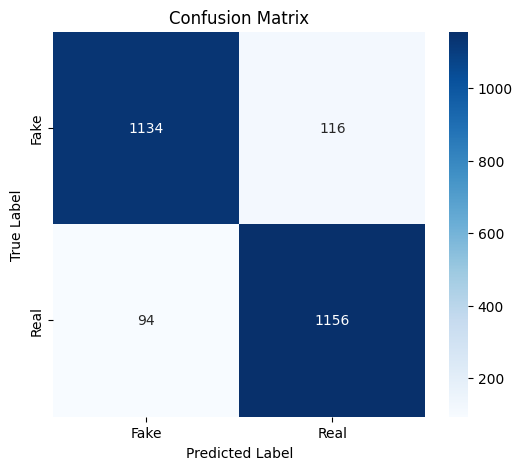

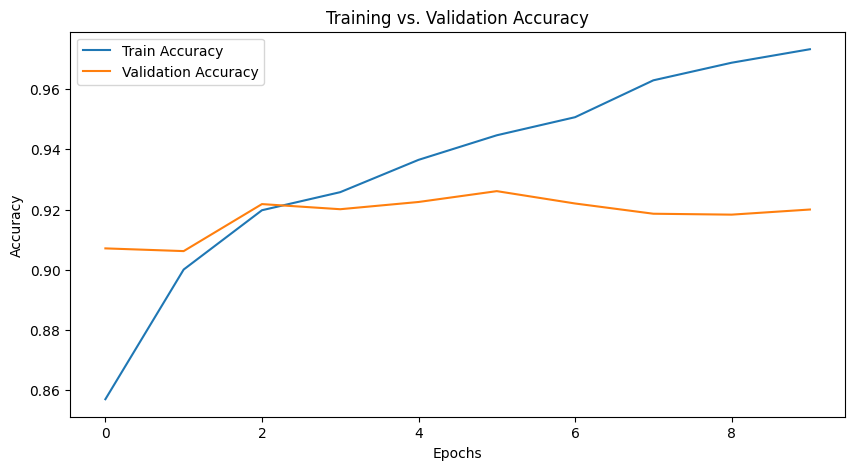

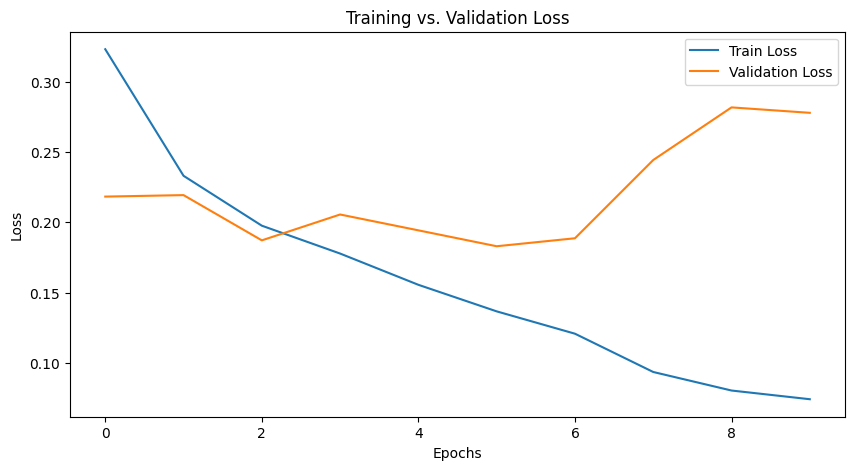

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Predict on Test Set
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2, X_test_sim, X_test_generic])  # Added extra features
y_pred = (y_pred_probs > 0.5).astype(int)

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ✅ Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ✅ Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


# ***CNN+Bi-LSTM***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

# ✅ Load Preprocessed Data
train_df = pd.read_csv("/content/train_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

# ✅ Extract Features
X_train_emb = train_df.iloc[:, 3:771].values  # BERT Embeddings (768-dim)
X_val_emb = val_df.iloc[:, 3:771].values
X_test_emb = test_df.iloc[:, 3:771].values

X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df.iloc[:, 771:-5].values  # POS Features (all columns after embeddings and before label)
X_val_pos = val_df.iloc[:, 771:-5].values
X_test_pos = test_df.iloc[:, 771:-5].values

X_train_gpt2 = train_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_val_gpt2 = val_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_test_gpt2 = test_df["GPT2_AI_Score"].values.reshape(-1, 1)

X_train_sim = train_df["Similarity_Score"].values.reshape(-1, 1)
X_val_sim = val_df["Similarity_Score"].values.reshape(-1, 1)
X_test_sim = test_df["Similarity_Score"].values.reshape(-1, 1)

X_train_generic = train_df["Contains_Generic_Phrases"].values.reshape(-1, 1)
X_val_generic = val_df["Contains_Generic_Phrases"].values.reshape(-1, 1)
X_test_generic = test_df["Contains_Generic_Phrases"].values.reshape(-1, 1)

y_train = train_df["Label"].values
y_val = val_df["Label"].values
y_test = test_df["Label"].values

# ✅ Standardize Numerical Features
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_val_sent = scaler.transform(X_val_sent)
X_test_sent = scaler.transform(X_test_sent)

X_train_pos = scaler.fit_transform(X_train_pos)
X_val_pos = scaler.transform(X_val_pos)
X_test_pos = scaler.transform(X_test_pos)

X_train_gpt2 = scaler.fit_transform(X_train_gpt2)
X_val_gpt2 = scaler.transform(X_val_gpt2)
X_test_gpt2 = scaler.transform(X_test_gpt2)

X_train_sim = scaler.fit_transform(X_train_sim)
X_val_sim = scaler.transform(X_val_sim)
X_test_sim = scaler.transform(X_test_sim)

X_train_generic = scaler.fit_transform(X_train_generic)
X_val_generic = scaler.transform(X_val_generic)
X_test_generic = scaler.transform(X_test_generic)

# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
gpt2_input = Input(shape=(1,), name="GPT2_AI_Score")  # GPT-2 Score
sim_input = Input(shape=(1,), name="Similarity_Score")  # Similarity Score
generic_input = Input(shape=(1,), name="Generic_Phrase_Flag")  # Contains Generic Phrase Flag

# ✅ CNN Branch for BERT Embeddings
conv1 = Conv1D(filters=256, kernel_size=10, activation="relu", padding="same")(embedding_input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Conv1D(filters=128, kernel_size=8, activation="relu", padding="same")(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Flatten()(conv1)  # Flatten for concatenation

# ✅ Bi-LSTM Branch for BERT Embeddings (Instead of LSTM)
bi_lstm = Bidirectional(LSTM(256, return_sequences=True))(embedding_input)
bi_lstm = Bidirectional(LSTM(128))(bi_lstm)

# ✅ Concatenate Features
merged = Concatenate()([conv1, bi_lstm, sentiment_input, pos_input, gpt2_input, sim_input, generic_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification Output

# ✅ Build & Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, gpt2_input, sim_input, generic_input], outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_gpt2, X_train_sim, X_train_generic], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_gpt2, X_val_sim, X_val_generic], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2, X_test_sim, X_test_generic], y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 24, 256)        │         82,176 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 12, 256)        │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 12, 128)        │        262,272 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 6, 128)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 24, 512)        │        591,872 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 768)            │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 256)            │        656,384 │ bidirectional[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 16)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GPT2_AI_Score             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Similarity_Score          │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Generic_Phrase_Flag       │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1044)           │              0 │ flatten[0][0],         │
│                           │                        │                │ bidirectional_1[0][0], │
│                           │                        │                │ Sentiment_Input[0][0], │
│                      

 Total params: 1,734,785 (6.62 MB)

 Trainable params: 1,734,785 (6.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 167s 399ms/step - accuracy: 0.7858 - loss: 0.4265 - val_accuracy: 0.8360 - val_loss: 0.3504
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 218s 442ms/step - accuracy: 0.8952 - loss: 0.2407 - val_accuracy: 0.9164 - val_loss: 0.2044
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 435ms/step - accuracy: 0.9128 - loss: 0.2069 - val_accuracy: 0.9193 - val_loss: 0.1942
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 430ms/step - accuracy: 0.9254 - loss: 0.1789 - val_accuracy: 0.9043 - val_loss: 0.2334
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 204s 435ms/step - accuracy: 0.9363 - loss: 0.1562 - val_accuracy: 0.9231 - val_loss: 0.1892
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 186s 394ms/step - accuracy: 0.9426 - loss: 0.1377 - val_accuracy: 0.9195 - val_loss: 0.2017
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 192s 370ms/step - accuracy: 0.9503 - loss: 0.1220 - val_accuracy: 0.9167 - val_loss: 0.2199
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 225s 430ms/step - accuracy: 0.9572 -

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step
Accuracy: 0.9128
Precision: 0.9388
Recall: 0.8832
F1-score: 0.9101

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1250
           1       0.94      0.88      0.91      1250

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



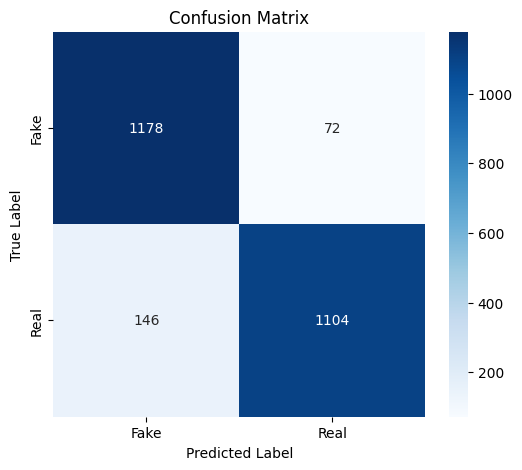

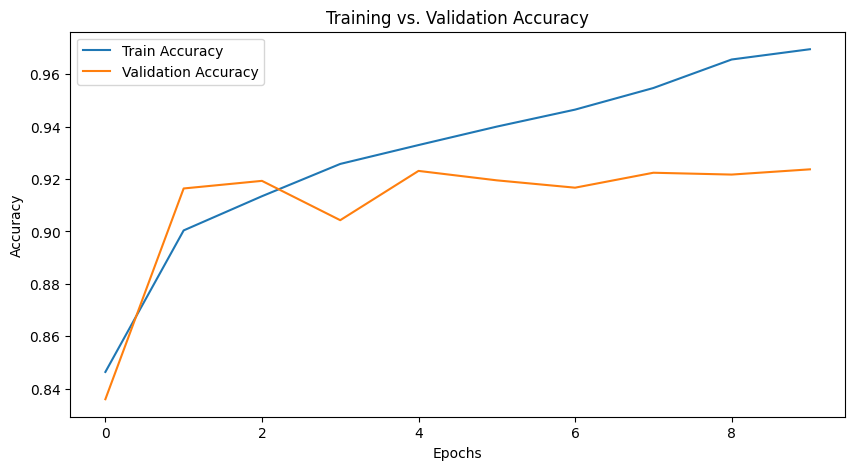

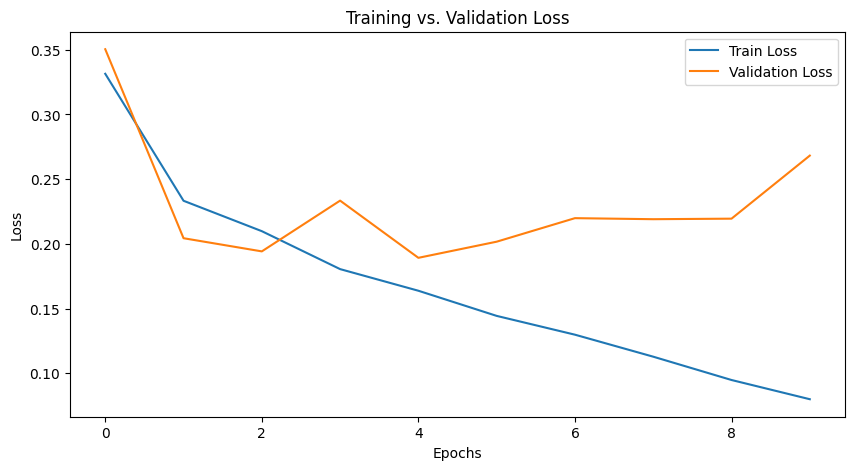

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Predict on Test Set
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2, X_test_sim, X_test_generic])  # Added extra features
y_pred = (y_pred_probs > 0.5).astype(int)

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ✅ Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ✅ Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


# ***CNN+GRU***

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

# ✅ Load Preprocessed Data
train_df = pd.read_csv("/content/train_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

# ✅ Extract Features
X_train_emb = train_df.iloc[:, 3:771].values  # BERT Embeddings (768-dim)
X_val_emb = val_df.iloc[:, 3:771].values
X_test_emb = test_df.iloc[:, 3:771].values

X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df.iloc[:, 771:-4].values  # POS Features (all columns after embeddings and before label)
X_val_pos = val_df.iloc[:, 771:-4].values
X_test_pos = test_df.iloc[:, 771:-4].values

X_train_gpt2 = train_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_val_gpt2 = val_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_test_gpt2 = test_df["GPT2_AI_Score"].values.reshape(-1, 1)

X_train_sim = train_df["Similarity_Score"].values.reshape(-1, 1)
X_val_sim = val_df["Similarity_Score"].values.reshape(-1, 1)
X_test_sim = test_df["Similarity_Score"].values.reshape(-1, 1)

X_train_gen = train_df["Contains_Generic_Phrases"].values.reshape(-1, 1)
X_val_gen = val_df["Contains_Generic_Phrases"].values.reshape(-1, 1)
X_test_gen = test_df["Contains_Generic_Phrases"].values.reshape(-1, 1)

y_train = train_df["Label"].values
y_val = val_df["Label"].values
y_test = test_df["Label"].values

# ✅ Standardize Numerical Features
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_val_sent = scaler.transform(X_val_sent)
X_test_sent = scaler.transform(X_test_sent)

X_train_pos = scaler.fit_transform(X_train_pos)
X_val_pos = scaler.transform(X_val_pos)
X_test_pos = scaler.transform(X_test_pos)

X_train_gpt2 = scaler.fit_transform(X_train_gpt2)
X_val_gpt2 = scaler.transform(X_val_gpt2)
X_test_gpt2 = scaler.transform(X_test_gpt2)

X_train_sim = scaler.fit_transform(X_train_sim)
X_val_sim = scaler.transform(X_val_sim)
X_test_sim = scaler.transform(X_test_sim)

X_train_gen = scaler.fit_transform(X_train_gen)
X_val_gen = scaler.transform(X_val_gen)
X_test_gen = scaler.transform(X_test_gen)

# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
gpt2_input = Input(shape=(1,), name="GPT2_Input")  # GPT2 AI Score
sim_input = Input(shape=(1,), name="Similarity_Input")  # Similarity Score
gen_input = Input(shape=(1,), name="Generic_Input")  # Contains Generic Phrases

# ✅ CNN Branch for BERT Embeddings
conv1 = Conv1D(filters=256, kernel_size=5, activation="relu", padding="same")(embedding_input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Conv1D(filters=128, kernel_size=3, activation="relu", padding="same")(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Flatten()(conv1)  # Flatten for concatenation

# ✅ GRU Branch for BERT Embeddings
gru = GRU(256, return_sequences=True)(embedding_input)
gru = GRU(128)(gru)

# ✅ Concatenate Features
merged = Concatenate()([conv1, gru, sentiment_input, pos_input, gpt2_input, sim_input, gen_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification Output

# ✅ Build & Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, gpt2_input, sim_input, gen_input], outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_gpt2, X_train_sim, X_train_gen], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_gpt2, X_val_sim, X_val_gen], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2, X_test_sim, X_test_gen], y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 24, 256)        │         41,216 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 12, 256)        │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 12, 128)        │         98,432 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 6, 128)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 24, 256)        │        222,720 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 768)            │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 128)            │        148,224 │ gru[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 17)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GPT2_Input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Similarity_Input          │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Generic_Input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 917)            │              0 │ flatten[0][0],         │
│                           │                        │                │ gru_1[0][0],           │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ GPT2_Input[0][0],      │
│                           │                        │                │ Similarity_Input[0][0… │
│                      

 Total params: 636,417 (2.43 MB)

 Trainable params: 636,417 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 197ms/step - accuracy: 0.7934 - loss: 0.4170 - val_accuracy: 0.8827 - val_loss: 0.2643
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 195ms/step - accuracy: 0.8921 - loss: 0.2558 - val_accuracy: 0.9180 - val_loss: 0.1962
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 201ms/step - accuracy: 0.9143 - loss: 0.2017 - val_accuracy: 0.8826 - val_loss: 0.2605
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 191ms/step - accuracy: 0.9287 - loss: 0.1759 - val_accuracy: 0.9204 - val_loss: 0.1951
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 191ms/step - accuracy: 0.9379 - loss: 0.1569 - val_accuracy: 0.9187 - val_loss: 0.1934
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 192ms/step - accuracy: 0.9488 - loss: 0.1309 - val_accuracy: 0.9100 - val_loss: 0.2301
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 190ms/step - accuracy: 0.9521 - loss: 0.1181 - val_accuracy: 0.9130 - val_loss: 0.2152
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 194ms/step - accuracy: 0.9612 - loss: 0

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step
Accuracy: 0.9136
Precision: 0.9143
Recall: 0.9128
F1-score: 0.9135

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1250
           1       0.91      0.91      0.91      1250

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



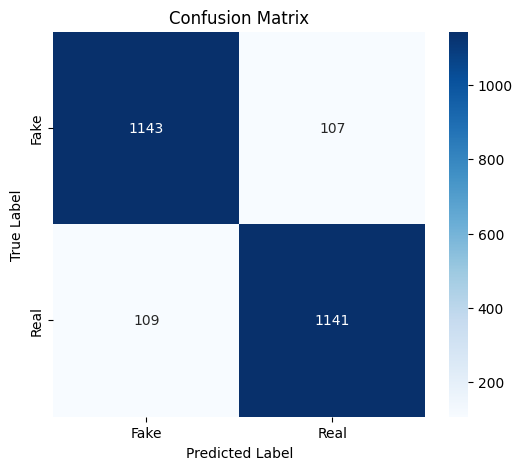

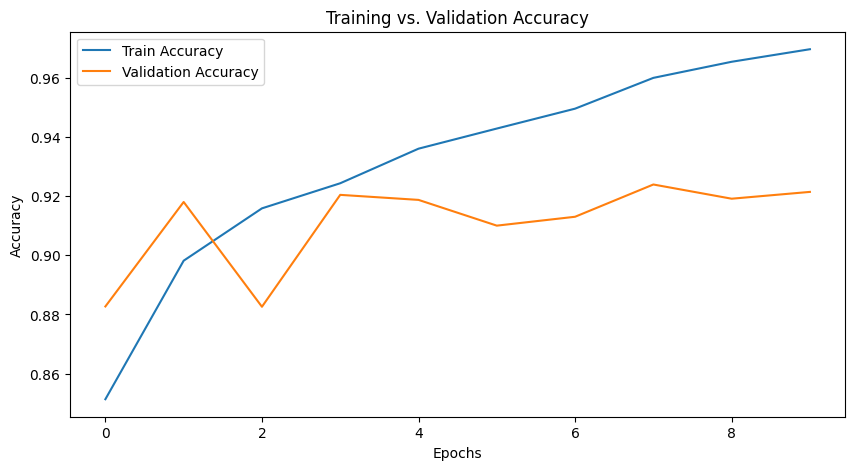

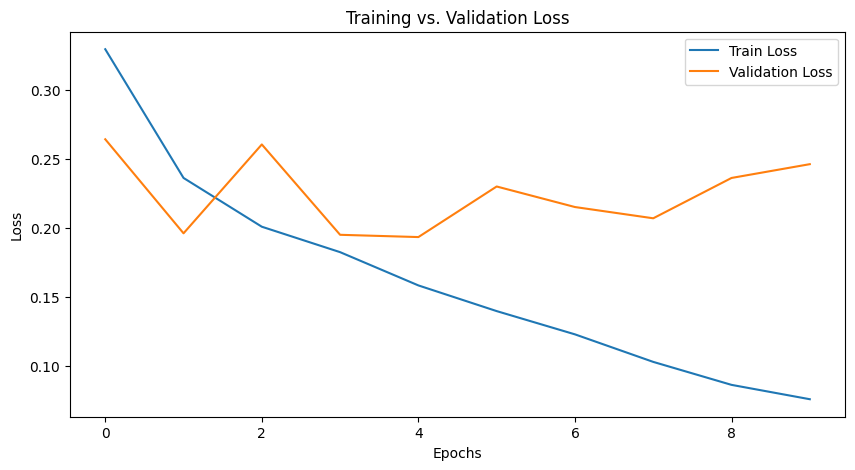

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Predict on Test Set
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2, X_test_sim, X_test_gen])  # Added extra features
y_pred = (y_pred_probs > 0.5).astype(int)

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ✅ Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ✅ Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


# ***CNN+Bi-LSTM+GRU***

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

# ✅ Load Preprocessed Data
train_df = pd.read_csv("/content/train_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

# ✅ Extract Features
X_train_emb = train_df.iloc[:, 3:771].values  # BERT Embeddings (768-dim)
X_val_emb = val_df.iloc[:, 3:771].values
X_test_emb = test_df.iloc[:, 3:771].values

X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df.iloc[:, 771:-5].values  # POS Features (excluding last 4 columns)
X_val_pos = val_df.iloc[:, 771:-5].values
X_test_pos = test_df.iloc[:, 771:-5].values

X_train_gpt2 = train_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_val_gpt2 = val_df["GPT2_AI_Score"].values.reshape(-1, 1)
X_test_gpt2 = test_df["GPT2_AI_Score"].values.reshape(-1, 1)

X_train_sim = train_df["Similarity_Score"].values.reshape(-1, 1)
X_val_sim = val_df["Similarity_Score"].values.reshape(-1, 1)
X_test_sim = test_df["Similarity_Score"].values.reshape(-1, 1)

X_train_generic = train_df["Contains_Generic_Phrases"].values.reshape(-1, 1)
X_val_generic = val_df["Contains_Generic_Phrases"].values.reshape(-1, 1)
X_test_generic = test_df["Contains_Generic_Phrases"].values.reshape(-1, 1)

y_train = train_df["Label"].values
y_val = val_df["Label"].values
y_test = test_df["Label"].values

# ✅ Standardize Numerical Features
scaler = StandardScaler()
X_train_sent = scaler.fit_transform(X_train_sent)
X_val_sent = scaler.transform(X_val_sent)
X_test_sent = scaler.transform(X_test_sent)

X_train_pos = scaler.fit_transform(X_train_pos)
X_val_pos = scaler.transform(X_val_pos)
X_test_pos = scaler.transform(X_test_pos)

X_train_gpt2 = scaler.fit_transform(X_train_gpt2)
X_val_gpt2 = scaler.transform(X_val_gpt2)
X_test_gpt2 = scaler.transform(X_test_gpt2)

X_train_sim = scaler.fit_transform(X_train_sim)
X_val_sim = scaler.transform(X_val_sim)
X_test_sim = scaler.transform(X_test_sim)

X_train_generic = scaler.fit_transform(X_train_generic)
X_val_generic = scaler.transform(X_val_generic)
X_test_generic = scaler.transform(X_test_generic)

# ✅ Reshape BERT Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 24, 32)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 24, 32)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 24, 32)

# ✅ Define Model Inputs
embedding_input = Input(shape=(24, 32), name="Embedding_Input")  # CNN on BERT
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
gpt2_input = Input(shape=(1,), name="GPT2_Input")  # GPT2 AI Score
similarity_input = Input(shape=(1,), name="Similarity_Input")  # Similarity Score
generic_input = Input(shape=(1,), name="Generic_Input")  # Contains Generic Phrases

# ✅ CNN Branch for BERT Embeddings
conv1 = Conv1D(filters=256, kernel_size=5, activation="relu", padding="same")(embedding_input)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Conv1D(filters=128, kernel_size=3, activation="relu", padding="same")(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Flatten()(conv1)  # Flatten for concatenation

# ✅ Bi-LSTM + GRU Branch for BERT Embeddings
bilstm_gru = Bidirectional(LSTM(256, return_sequences=True))(embedding_input)
bilstm_gru = GRU(128)(bilstm_gru)

# ✅ Concatenate Features
merged = Concatenate()([conv1, bilstm_gru, sentiment_input, pos_input, gpt2_input, similarity_input, generic_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary Classification Output

# ✅ Build & Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, gpt2_input, similarity_input, generic_input], outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_gpt2, X_train_sim, X_train_generic], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_gpt2, X_val_sim, X_val_generic], y_val),
    epochs=10, batch_size=32
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2, X_test_sim, X_test_generic], y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 24, 32)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 24, 256)        │         41,216 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 12, 256)        │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 12, 128)        │         98,432 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 6, 128)         │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 24, 512)        │        591,872 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 768)            │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_2 (GRU)               │ (None, 128)            │        246,528 │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 16)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ GPT2_Input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Similarity_Input          │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Generic_Input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 916)            │              0 │ flatten_1[0][0],       │
│ (Concatenate)             │                        │                │ gru_2[0][0],           │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ GPT2_Input[0][0],      │
│                      

 Total params: 1,103,745 (4.21 MB)

 Trainable params: 1,103,745 (4.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 338ms/step - accuracy: 0.7914 - loss: 0.4308 - val_accuracy: 0.8914 - val_loss: 0.2457
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 274ms/step - accuracy: 0.8972 - loss: 0.2489 - val_accuracy: 0.9129 - val_loss: 0.2056
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 277ms/step - accuracy: 0.9176 - loss: 0.1995 - val_accuracy: 0.8991 - val_loss: 0.2355
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 272ms/step - accuracy: 0.9294 - loss: 0.1759 - val_accuracy: 0.9153 - val_loss: 0.2120
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 107s 273ms/step - accuracy: 0.9359 - loss: 0.1569 - val_accuracy: 0.9109 - val_loss: 0.2306
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 271ms/step - accuracy: 0.9418 - loss: 0.1453 - val_accuracy: 0.9259 - val_loss: 0.1879
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 270ms/step - accuracy: 0.9540 - loss: 0.1184 - val_accuracy: 0.9157 - val_loss: 0.2293
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 264ms/step - accuracy: 0.9584 -

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step
Accuracy: 0.9068
Precision: 0.9111
Recall: 0.9016
F1-score: 0.9063

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1250
           1       0.91      0.90      0.91      1250

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



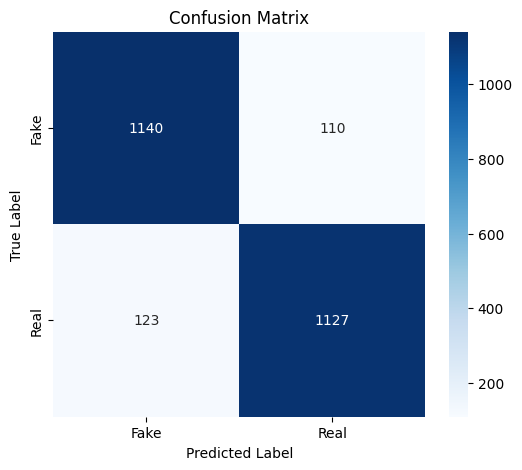

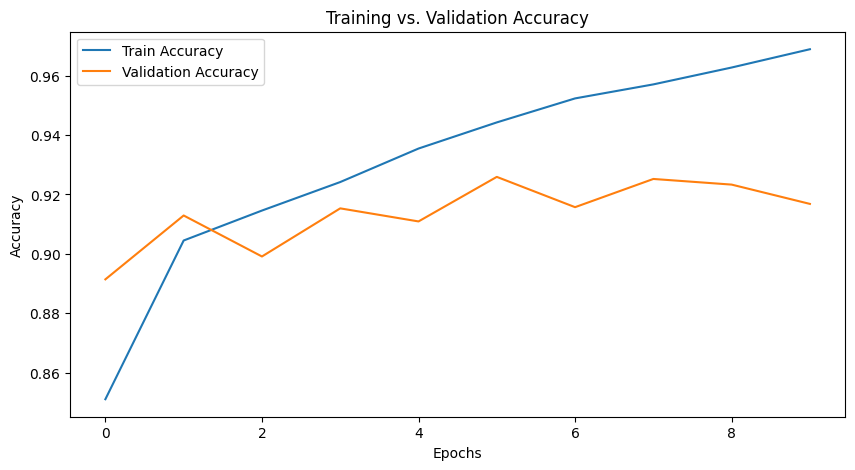

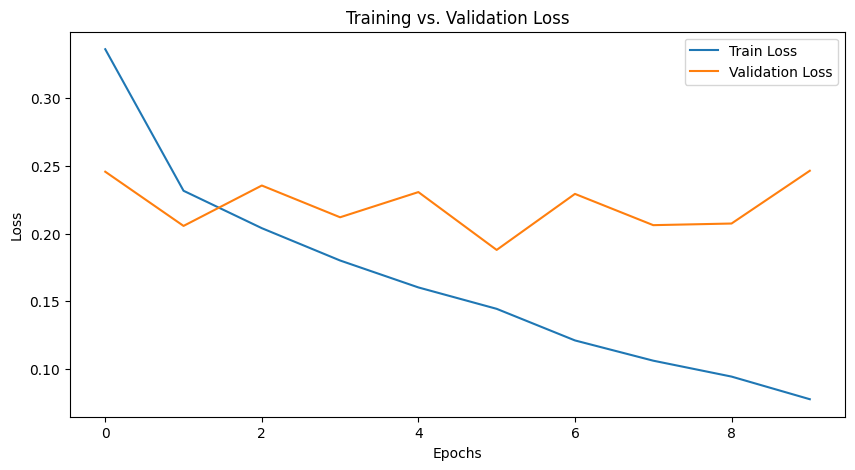

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Predict on Test Set
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_gpt2, X_test_sim, X_test_generic])  # Added extra features
y_pred = (y_pred_probs > 0.5).astype(int)

# ✅ Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ✅ Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ✅ Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()
